# Practice Linear Regression

In [1]:
# Install 

# Linux / Binder
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [6]:
# Check the size of dataset
len(dataset)

60000

In [8]:
# Additional set pf 10 000 images used for evaluating models.
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F7527FDC940>, 5)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 0


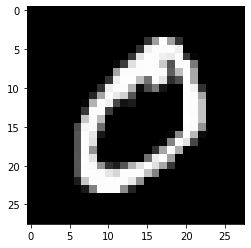

In [18]:
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 5


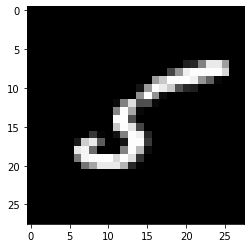

In [19]:
image, label = dataset[11]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [20]:
import torchvision.transforms as transforms

In [21]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [22]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [29]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch)

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


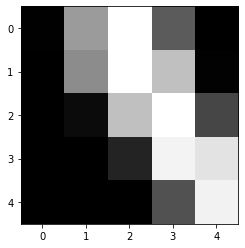

In [32]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

## Training and Validation Datasets


1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.


In [36]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [37]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

In [38]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model=nn.Linear(input_size, num_classes)

In [39]:
print(model.weight.shape)

torch.Size([10, 784])


In [41]:
model.weight

Parameter containing:
tensor([[ 0.0255, -0.0271, -0.0351,  ..., -0.0117,  0.0157,  0.0060],
        [-0.0257,  0.0047,  0.0204,  ...,  0.0235, -0.0295, -0.0169],
        [-0.0156, -0.0256, -0.0132,  ..., -0.0132,  0.0120, -0.0162],
        ...,
        [ 0.0355, -0.0085, -0.0098,  ..., -0.0023,  0.0094,  0.0339],
        [-0.0019, -0.0082,  0.0128,  ...,  0.0226,  0.0165,  0.0017],
        [-0.0088,  0.0011,  0.0301,  ..., -0.0176, -0.0030, -0.0041]],
       requires_grad=True)

In [42]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0034, -0.0275, -0.0231,  0.0005,  0.0026, -0.0088,  0.0255, -0.0150,
        -0.0163, -0.0036], requires_grad=True)

In [43]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([4, 3, 8, 7, 4, 0, 5, 0, 8, 6, 9, 5, 0, 1, 3, 8, 1, 3, 0, 2, 9, 0, 0, 1,
        1, 9, 7, 8, 4, 4, 8, 2, 3, 3, 8, 1, 2, 8, 6, 3, 2, 3, 2, 2, 3, 9, 3, 7,
        2, 6, 7, 1, 8, 7, 7, 6, 4, 6, 8, 9, 1, 1, 2, 7, 0, 7, 9, 4, 7, 7, 6, 4,
        1, 9, 7, 5, 8, 1, 8, 3, 2, 3, 4, 9, 6, 5, 8, 7, 9, 1, 1, 1, 2, 3, 2, 3,
        2, 8, 5, 1, 5, 2, 6, 5, 2, 3, 4, 8, 3, 1, 8, 5, 3, 0, 0, 0, 8, 4, 1, 4,
        9, 7, 9, 6, 5, 1, 0, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)